#Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# install splitfolders to split dataset
! pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder

In [4]:
#Select .json location
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Tubes ML"

In [5]:
#command api kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:04<00:00, 44.0MB/s]
100% 163M/163M [00:04<00:00, 36.3MB/s]


In [6]:
!unzip face-mask-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

#Preprocessing Data

In [7]:
%cd /content/
%mkdir dataset

/content


In [8]:
#splitting dataset to 3 dir with 80,10,10 -> train, val, test
data_dir = '/content/data'
output = '/content/dataset'
splitfolders.ratio(data_dir, output=output, seed=42, ratio=(.8, .1, .1)) 
# ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example

Copying files: 7553 files [00:02, 2592.82 files/s]


In [9]:
# create train, val, test paths
train_dir = os.path.join('/content/dataset/train')
validation_dir = os.path.join('/content/dataset/val')
test_dir= os.path.join('/content/dataset/test')

In [10]:
mask_train_path = train_dir + '/with_mask'
nomask_train_pat = train_dir + '/without_mask'
mask_val_path = validation_dir + '/with_mask'
nomask_val_path = validation_dir + '/without_mask'
mask_test_path = test_dir + '/with_mask'
nomask_test_path = test_dir + '/without_mask'

mask_len_train = len(os.listdir(mask_train_path))
nomask_len_train = len(os.listdir(nomask_train_pat))
mask_len_val = len(os.listdir(mask_val_path))
nomask_len_val = len(os.listdir(nomask_val_path))
mask_len_test = len(os.listdir(mask_test_path))
nomask_len_test = len(os.listdir(nomask_test_path))

print("jumlah dataset Training : ", mask_len_train + nomask_len_train)
print("jumlah dataset Validasi : ", mask_len_val + nomask_len_val)
print("jumlah dataset Test     : ", mask_len_test + nomask_len_test)
print("jumlah total Dataset    : ", mask_len_train + nomask_len_train + mask_len_val + nomask_len_val + mask_len_test + nomask_len_test)
print("\n\n")
print("jumlah train kelas Mask : ", mask_len_train)
print("jumlah train kelas No Mask : ", nomask_len_train)
print("jumlah validasi kelas Mask : ", mask_len_val)
print("jumlah validasi kelas No Mask : ", nomask_len_val)
print("jumlah test kelas Mask : ", mask_len_test)
print("jumlah test kelas No Mask : ", nomask_len_test)

jumlah dataset Training :  6042
jumlah dataset Validasi :  754
jumlah dataset Test     :  757
jumlah total Dataset    :  7553



jumlah train kelas Mask :  2980
jumlah train kelas No Mask :  3062
jumlah validasi kelas Mask :  372
jumlah validasi kelas No Mask :  382
jumlah test kelas Mask :  373
jumlah test kelas No Mask :  384


#Augmentation Dataset

In [32]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6042 images belonging to 2 classes.
Found 754 images belonging to 2 classes.


#Model 1

In [13]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout, SpatialDropout2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

In [15]:
'''
Import Library yang dibutuhkan
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten,Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [16]:
#optimizer
tagetdir = '/content/gdrive/MyDrive/Tubes ML/Model4.h5'
savedir = tagetdir
callbacks = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')        
best_model = ModelCheckpoint(savedir, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [37]:
# build a simple model
model = Sequential()

model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1,activation="sigmoid"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 70, 70, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 35, 35, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 33, 33, 256)      

In [39]:
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf
# compile model
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
# training & saving history of every epoch
history = model.fit_generator(
      train_generator,
      steps_per_epoch=302,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=37,  #  images = batch_size * steps
      callbacks = [callbacks, best_model])


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


 93/302 [========>.....................] - ETA: 32s - loss: 0.7934 - accuracy: 0.6526

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


302/302 [==============================] - ETA: 0s - loss: 0.6753 - accuracy: 0.7195
Epoch 1: val_accuracy improved from -inf to 0.82703, saving model to /content/gdrive/MyDrive/Tubes ML/Model4.h5
302/302 [==============================] - 56s 173ms/step - loss: 0.6753 - accuracy: 0.7195 - val_loss: 0.5411 - val_accuracy: 0.8270
Epoch 2/100
302/302 [==============================] - ETA: 0s - loss: 0.5430 - accuracy: 0.7816
Epoch 2: val_accuracy improved from 0.82703 to 0.88784, saving model to /content/gdrive/MyDrive/Tubes ML/Model4.h5
302/302 [==============================] - 52s 174ms/step - loss: 0.5430 - accuracy: 0.7816 - val_loss: 0.3048 - val_accuracy: 0.8878
Epoch 3/100
302/302 [==============================] - ETA: 0s - loss: 0.5135 - accuracy: 0.7903
Epoch 3: val_accuracy did not improve from 0.88784
302/302 [==============================] - 49s 163ms/step - loss: 0.5135 - accuracy: 0.7903 - val_loss: 0.3713 - val_accuracy: 0.8419
Epoch 4/100
302/302 [====================

#Evaluasi Model 1

In [41]:
import pandas as pd
#Dataframe capturing the accuracy and loss per epoch
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.675276,0.719528,0.541090,0.827027
1,0.543016,0.781634,0.304764,0.887838
2,0.513480,0.790269,0.371264,0.841892
3,0.478970,0.803720,0.261269,0.891892
4,0.474287,0.804550,0.412922,0.847297
...,...,...,...,...
95,0.073578,0.972434,0.072018,0.977027
96,0.073238,0.976088,0.045314,0.982432
97,0.057562,0.979409,0.051209,0.978378
98,0.074008,0.974427,0.083544,0.972973


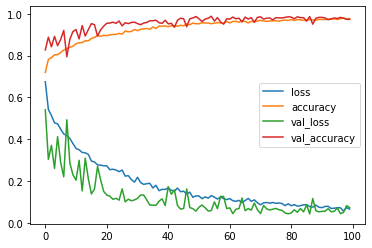

In [42]:
history_df.plot();

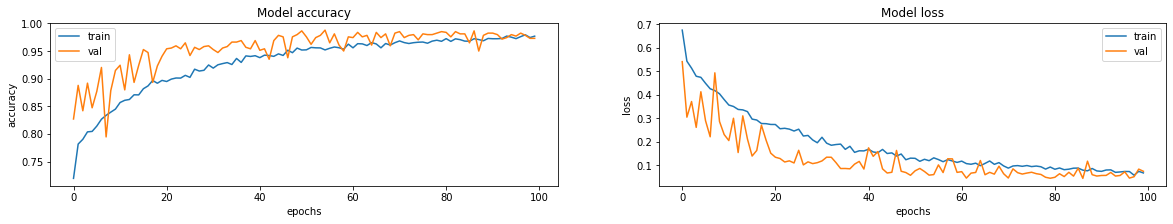

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [45]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [46]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Tubes ML/Model4.h5'
model = load_model(model_path)

Found 757 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.9775429326287979
Precision : 0.9778207169385905
f1Score : 0.9775436380310134
[[369   4]
 [ 13 371]]


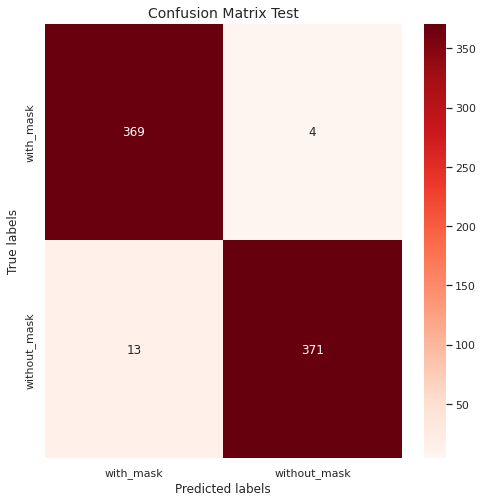

In [47]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=55

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/dataset/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= 'binary',
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

#Model 2

In [ ]:
# import all libraries needed
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import os
import zipfile
import shutil
import splitfolders
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dropout, SpatialDropout2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D

In [ ]:
#exponanential decay for learning rate schedule
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = LearningRateScheduler(exponential_decay_fn)

In [ ]:
#optimizer
tagetdir = '/content/gdrive/MyDrive/Tubes ML/Model4Categorical.h5'
savedir = tagetdir
callbacks = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')        
best_model = ModelCheckpoint(savedir, monitor='val_accuracy', verbose = 1, save_best_only = True)

In [ ]:
# build a simple model
model = Sequential()

model.add(InputLayer(input_shape=[150, 150, 3]))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=256,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))

model.add(Conv2D(filters=512,kernel_size=3,strides=1,activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),padding="same"))


model.add(Flatten())

model.add(Dense(units=512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 72, 72, 128)       73856     
                                                                 
 conv2d_43 (Conv2D)          (None, 70, 70, 128)       147584    
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 35, 35, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 33, 33, 256)      

In [ ]:
from tensorflow.keras.optimizers import Adamax
import tensorflow as tf
# compile model
model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# training & saving history of every epoch
H = model.fit(train_iterator, epochs=100, 
              batch_size=64, validation_data=val_iterator,
              callbacks=[callbacks, best_model, lr_scheduler]
              )


Epoch 1/100


ValueError: ignored

#Evaluasi Model 2

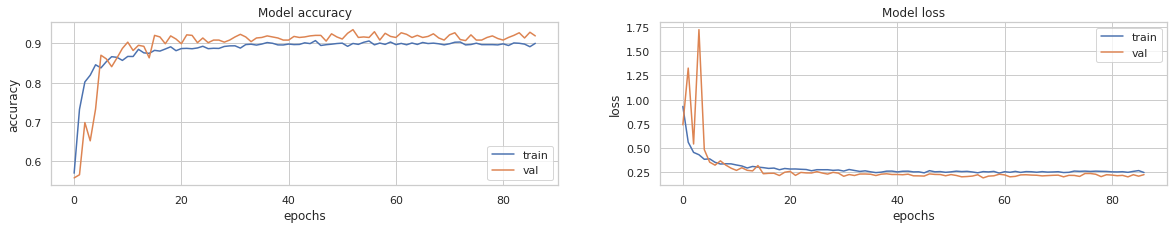

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(H.history[met])
    ax[i].plot(H.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = tagetdir
model = load_model(model_path)

Found 757 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.48348745046235136
Precision : 0.3326528161402666
f1Score : 0.32570049440106125
[[364   9]
 [382   2]]


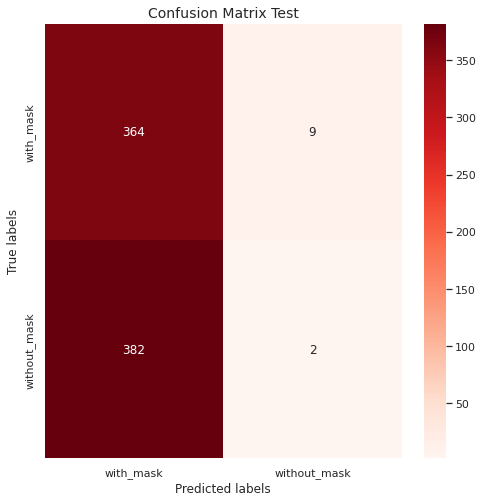

In [ ]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=55

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/dataset/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(8,8))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()